## Correlograms

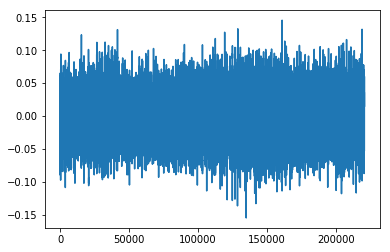

In [7]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

helicopters = []
boats = []

sampling_rate = 44100 # All clips will be converted to this rate
duration = 5 # How much of clip to use (seconds)

# Import raw data
for i in range(10):
    raw_data = librosa.load("heli" + str(i) + "_short.wav", sr=sampling_rate, mono=False, duration=duration)
    
    # Only use one channel
    if raw_data[0].shape[0] == 2:
        raw_data = (raw_data[0][0], raw_data[1])
    helicopters.append(raw_data)
    
    raw_data = librosa.load("boat" + str(i) + "_short.wav", sr=sampling_rate, mono=False, duration=duration)
    # Only use one channel
    if raw_data[0].shape[0] == 2:
        raw_data = (raw_data[0][0], raw_data[1])
    boats.append(raw_data)

plt.plot(helicopters[0][0])
plt.show()

### Helicopters

0


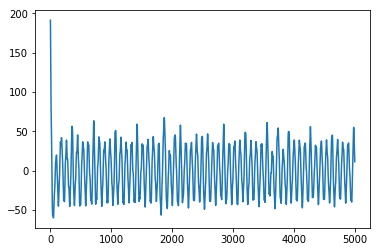

1


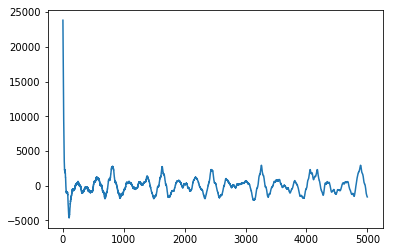

2


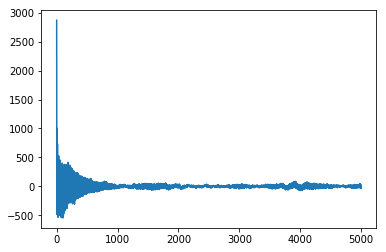

3


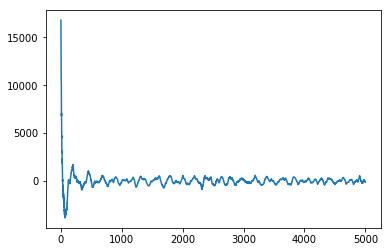

4


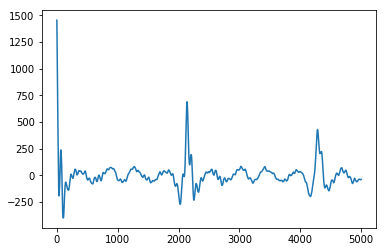

5


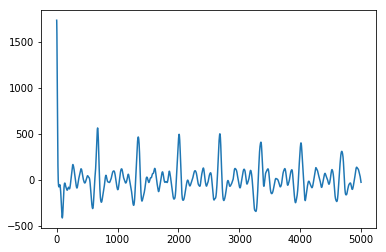

6


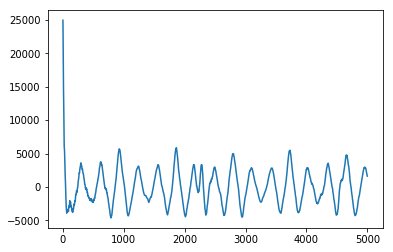

7


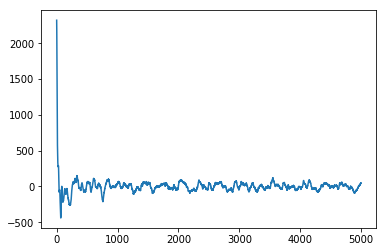

8


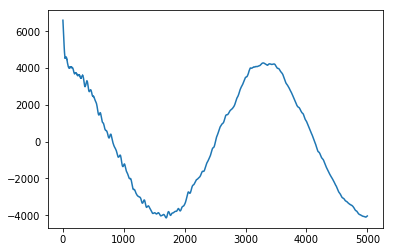

9


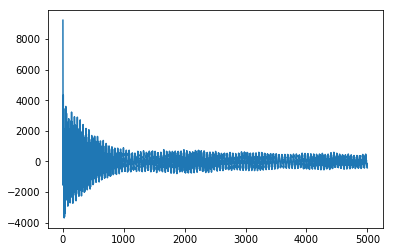

In [11]:
autocorr = []

for i in range(len(helicopters)):
    data = helicopters[i]
    autocorr.append(librosa.core.autocorrelate(data[0], max_size=5000))
    #pa = sm.tsa.pacf(data, 100)

    print(i)
    #plt.subplot(2, 1, 1)
    plt.plot(autocorr[i])
    #plt.subplot(2, 1, 2)
    #plt.plot(pa)
    plt.show()

### Boats

0


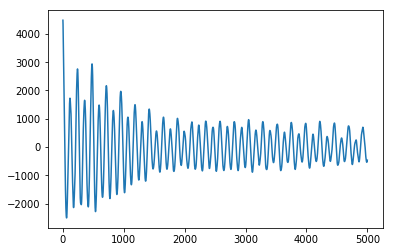

1


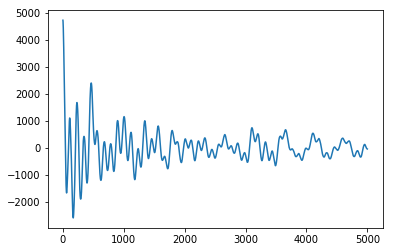

2


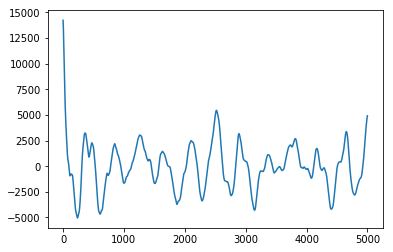

3


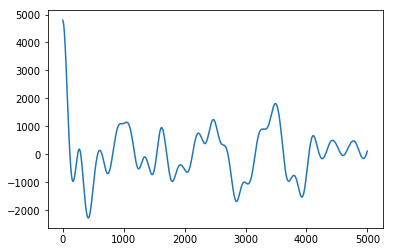

4


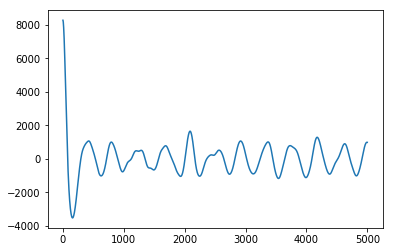

5


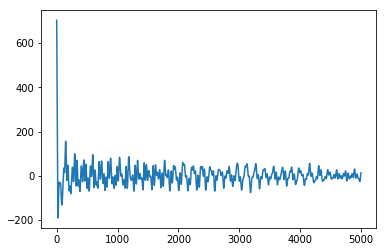

6


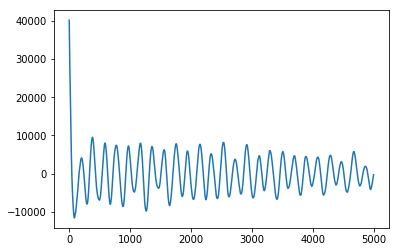

7


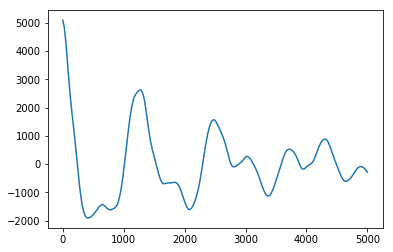

8


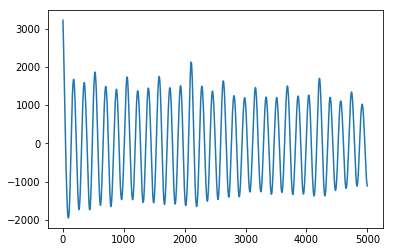

9


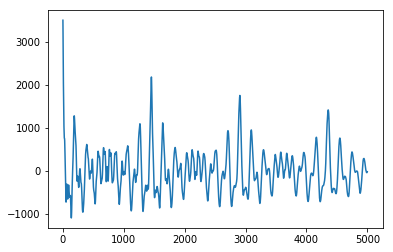

In [9]:
autocorr = []

for i in range(len(boats)):
    data = boats[i]
    autocorr.append(librosa.core.autocorrelate(data[0], max_size=5000))
    #pa = sm.tsa.pacf(data, 100)

    print(i)
    #plt.subplot(2, 1, 1)
    plt.plot(autocorr[i])
    #plt.subplot(2, 1, 2)
    #plt.plot(pa)
    plt.show()